In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [5]:
# read data from csv file
data = pd.read_csv("cal-housing.csv")

In [29]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
val = data['ocean_proximity'].value_counts()
print(val)
for n in val:
    print(n/len(data))

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
0.44263565891472867
0.31739341085271316
0.12877906976744186
0.11094961240310078
0.00024224806201550387


In [12]:
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186CD814088>,
      dtype=object)

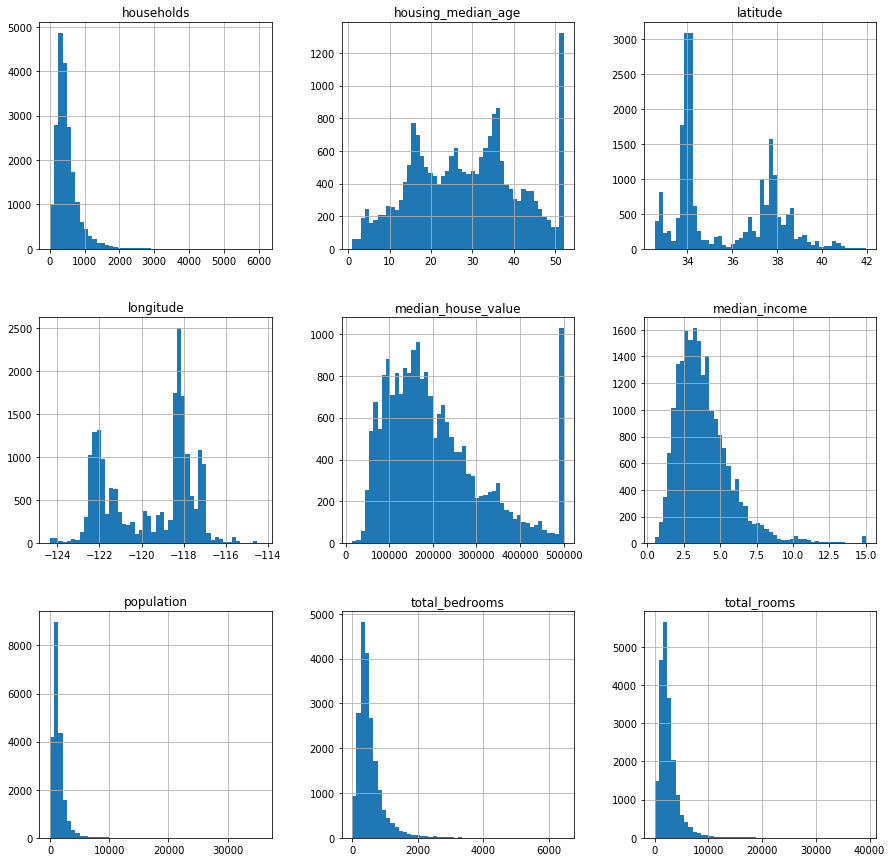

In [40]:
data.hist(bins=50, figsize=(15,15))


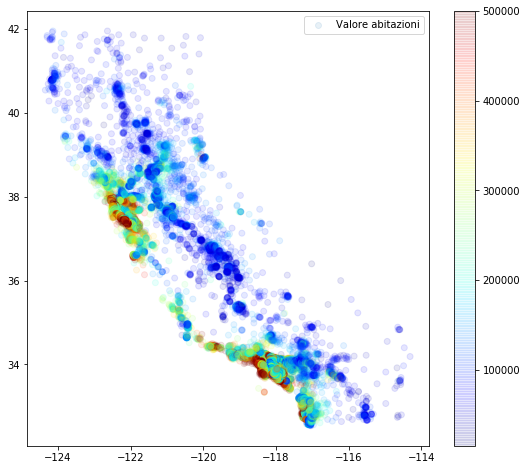

In [38]:
plt.figure(figsize=(9,8))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1,c=data['median_house_value'],cmap=plt.get_cmap("jet"),label='Valore abitazioni')
plt.colorbar()
plt.legend()

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
longitude,True,False,False,False,False,False,False,False,False,False,False,False
latitude,False,True,False,False,False,False,False,False,False,False,False,False
housing_median_age,False,False,True,False,False,False,False,False,False,False,False,False
total_rooms,False,False,False,True,True,True,True,False,False,False,False,False
total_bedrooms,False,False,False,True,True,True,True,False,False,False,False,False
population,False,False,False,True,True,True,True,False,False,False,False,False
households,False,False,False,True,True,True,True,False,False,False,False,False
median_income,False,False,False,False,False,False,False,True,False,False,False,False
median_house_value,False,False,False,False,False,False,False,False,True,False,False,False
rooms_per_household,False,False,False,False,False,False,False,False,False,True,False,False


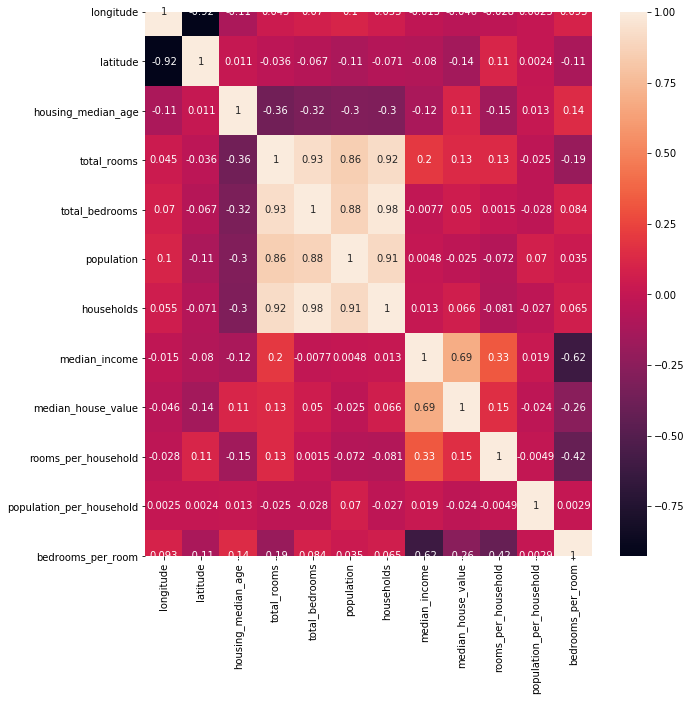

In [13]:
def get_corr_data(data):
    corr_matrix = data.corr(method='pearson')
    print(corr_matrix['median_house_value'].sort_values(ascending=False))

def get_corr_heatmap(data):
    corr_matrix = data.corr(method='pearson')
    plt.figure(figsize=(10,10))
    sns.heatmap(corr_matrix, annot=True)
    

get_corr_data(data)


get_corr_heatmap(data)
data.corr() > 0.85

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D8F0D61C8>,
      dtype=object)

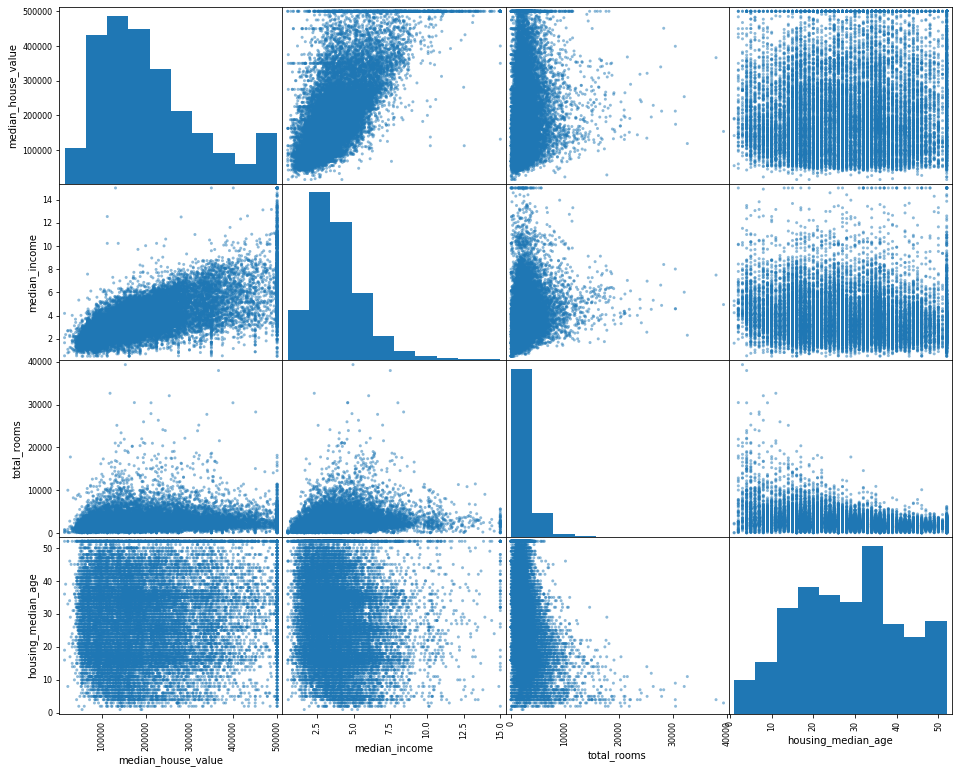

In [8]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(data[attributes], figsize=(16,13))

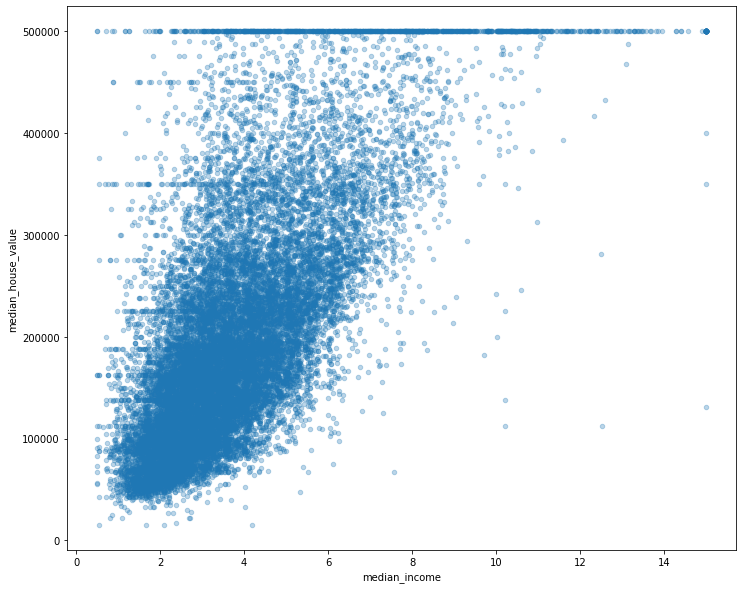

In [9]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3, figsize=(12,10))

In [5]:
#missing data
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/total 
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)

report_missing_data(data)

                    Total  Percent
total_bedrooms        207      1.0
ocean_proximity         0      NaN
median_house_value      0      NaN
median_income           0      NaN
households              0      NaN
population              0      NaN
total_rooms             0      NaN
housing_median_age      0      NaN
latitude                0      NaN
longitude               0      NaN


In [10]:
data['rooms_per_household']=data['total_rooms']/data['households']
data['population_per_household']=data['population']/data['households']
data['bedrooms_per_room']=data['total_bedrooms']/data['total_rooms']

# Data skewed

In [11]:
x = data.copy()
x = x.drop("ocean_proximity", axis=1)

In [12]:
def normalize(X):
    return (X - X.mean())/X.std()
x = normalize(x)

In [26]:
features=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
          'median_income', 'median_house_value', 'latitude', 'longitude', 'rooms_per_household', 'population_per_household', 'bedrooms_per_room']
skewness=[]
for i in features:
    skewness.append([data[i].skew(), x[i].skew()])

pd.DataFrame(data=skewness,index=features,columns=['stock', 'normalized'])

,stock,normalized
housing_median_age,0.060331,0.060331
total_rooms,4.147343,4.147343
total_bedrooms,3.459546,3.459546
population,4.935858,4.935858
households,3.410438,3.410438
median_income,1.646657,1.646657
median_house_value,0.977763,0.977763
latitude,0.465953,0.465953
longitude,-0.297801,-0.297801
rooms_per_household,20.697869,20.697869


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162E0CE4288>,
      dtype=object)

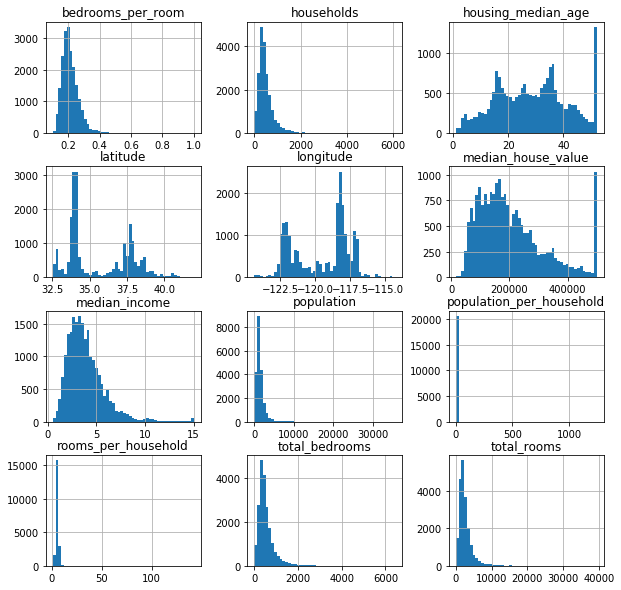

In [8]:
data.hist(bins=50, figsize=(10,10))

In [9]:
data_no_skw = data.copy()
data_no_skw1 = data.copy()
features=['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'population_per_household', 'bedrooms_per_room']
for i in features:
    data_no_skw[i] = np.log(data_no_skw[i])
    data_no_skw1[i] = np.sqrt(data_no_skw1[i])
skewness=[]
skewness1=[]
for i in features:
    skewness.append(data_no_skw[i].skew())
    skewness1.append(data_no_skw1[i].skew())

print(skewness)
print(skewness1)

[-1.0973382354457752, -1.0674552503680792, -1.070786100914493, -1.1243581700660608, -0.14608181157738845, -0.17317539032496318, 0.8680607951109436, 2.1275987743502807, 0.537090389482618]
[1.3555003993057428, 1.2060445555661234, 1.2246549321367803, 1.1268722456847338, 0.6892247132592377, 0.43938209295248964, 4.850183404126622, 43.34203502900218, 1.1903212301000412]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162E6F113C8>,
      dtype=object)

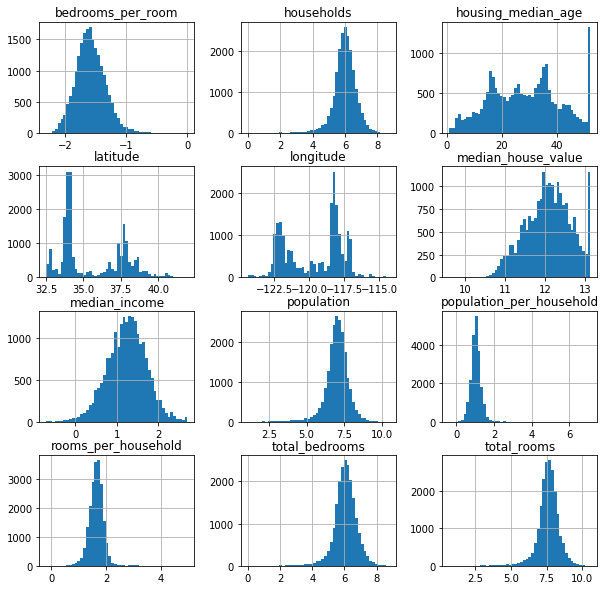

In [15]:
data_no_skw.hist(bins=50, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162E0A71D48>,
      dtype=object)

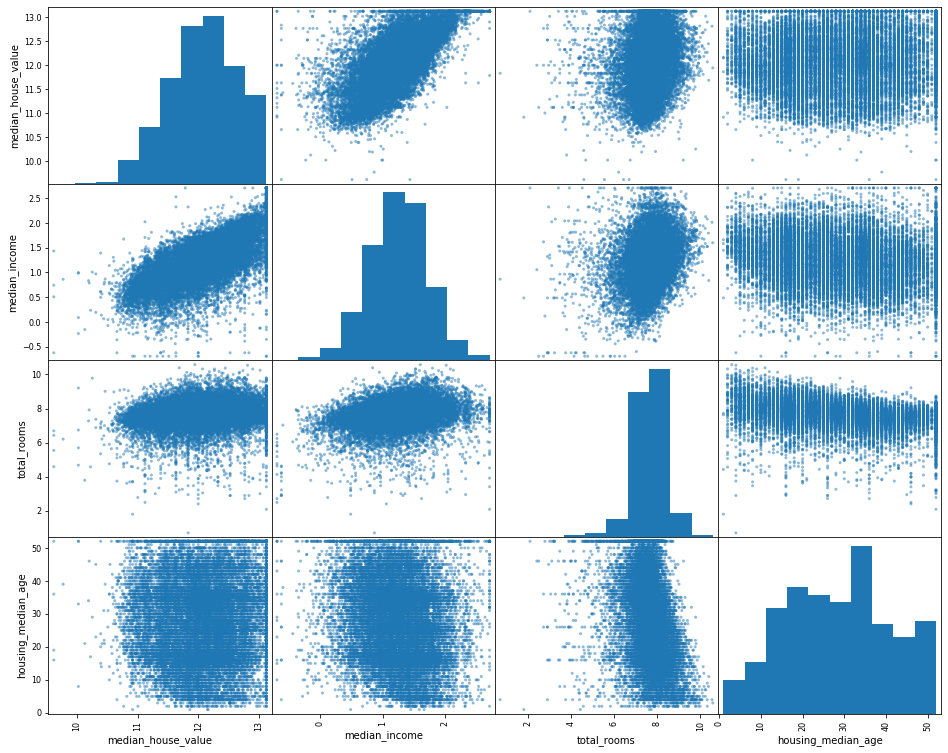

In [11]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(data_no_skw[attributes], figsize=(16,13))

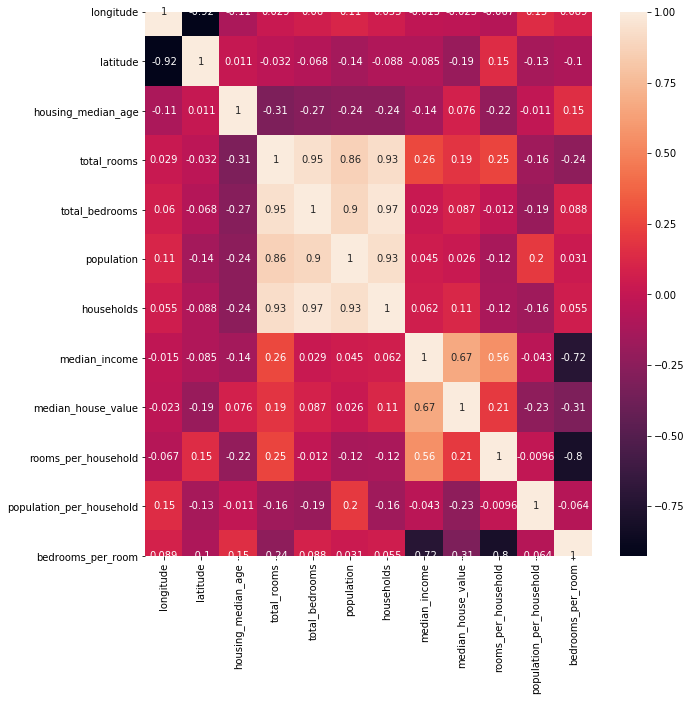

In [14]:

get_corr_heatmap(data_no_skw)